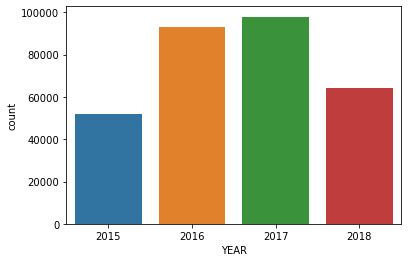

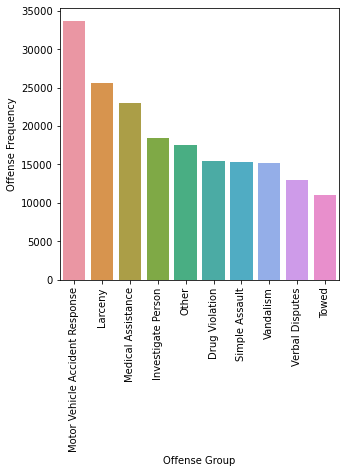

Text(-9.074999999999996, 0.5, 'Count')

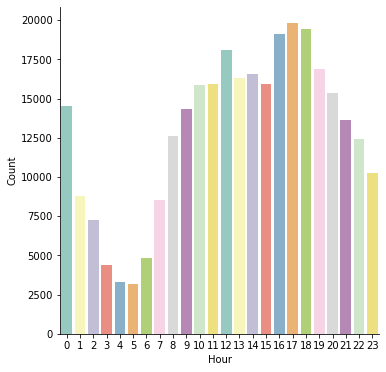

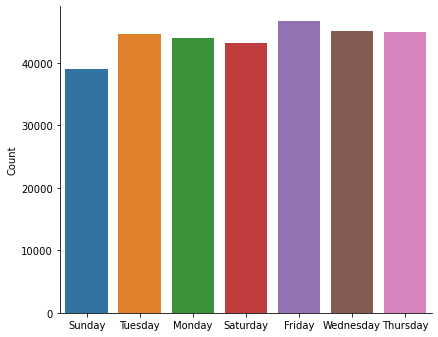

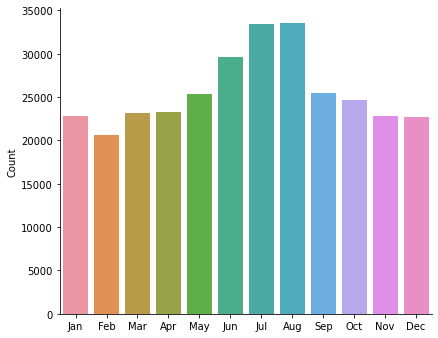

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
%matplotlib inline

# data preprocess
df = pd.read_csv('./boston_crime.csv', encoding = 'latin-1')
df = df.drop(columns='SHOOTING')
df['Lat'].fillna(-1, inplace=True)
df['Long'].fillna(-1, inplace=True)
df = df.dropna()

#There is an increase in crime from 2016 to 2017. 
#The Year 2015 and 2018 seem to have less count as some of the months' crime data are not available.
sns.countplot(data=df, x='YEAR')

# Top 10 Offenses' count
with sns.color_palette("RdBu",4):   
    fig = plt.figure(figsize=(5,5))
    order = df['OFFENSE_CODE_GROUP'].value_counts().head(10).index
    chart=sns.countplot(data = df, x='OFFENSE_CODE_GROUP', order = order)
    plt.xlabel("Offense Group")
    plt.ylabel("Offense Frequency")
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()
    
# count of crimes committed at a specific hour of the day 
sns.catplot(x='HOUR',
           kind='count',
            height=5.27, 
            aspect=1,
            palette="Set3",
           data=df)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('Hour', fontsize=10)
plt.ylabel('Count', fontsize=10)

# count of crimes committed on a particular day
sns.catplot(x='DAY_OF_WEEK',
           kind='count',
            height=5, 
            aspect=1.2,
           data=df)
plt.xticks(size=10)
plt.yticks(size=10)
plt.xlabel('')
plt.ylabel('Count', fontsize=10)

# count of crimes committed in a particular month
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.catplot(x='MONTH',
           kind='count',
            height=5, 
            aspect=1.2,
           data=df)
plt.xticks(np.arange(12), months, size=10)
plt.yticks(size=10)
plt.xlabel('')
plt.ylabel('Count', fontsize=10)

DISTRICT  UCR_PART  
A1        Other            68
          Part One       8278
          Part Three    15186
          Part Two      10645
A15       Other            24
          Part One       1235
          Part Three     3303
          Part Two       1768
A7        Other            75
          Part One       2178
          Part Three     6687
          Part Two       4301
B2        Other           228
          Part One       8557
          Part Three    23614
          Part Two      15717
B3        Other           166
          Part One       4916
          Part Three    18721
          Part Two      10871
C11       Other           190
          Part One       6618
          Part Three    21423
          Part Two      13212
C6        Other           112
          Part One       4386
          Part Three    11029
          Part Two       6981
D14       Other            56
          Part One       3894
          Part Three    10523
          Part Two       5182
D4        Other    

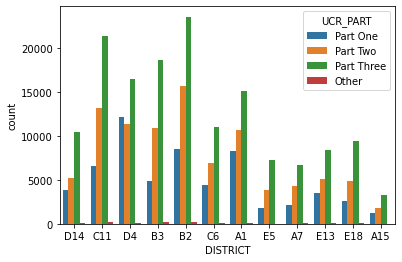

In [22]:
# Get the districts with maximum number of crimes
sns.countplot(x="DISTRICT", hue="UCR_PART", data=df)
df['COUNT'] = 1
group_data = df.groupby(['DISTRICT','UCR_PART'])['COUNT'].sum()
print(group_data)

In [11]:
# Take Boston coordinate
crime_map = folium.Map(location=[42.361145,-71.057083],
                        tiles = "Stamen Terrain",
                        zoom_start = 13)

# Visualize most frequent crime occurred in Boston
heat_df = df[df['OFFENSE_CODE_GROUP']=='Motor Vehicle Accident Response']
heat_df = heat_df[['Lat', 'Long']]
heat_data = [[row['Lat'],row['Long']] for index, row in heat_df.iterrows()]
HeatMap(heat_data, radius=10).add_to(crime_map)
crime_map